In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from keras.models  import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint 
import pandas as pd

In [10]:
%cd drive/My\ Drive/SIH

/content/drive/My Drive/SIH


In [13]:
df= pd.read_excel('ANN_sih_Data.xls')
df.shape

(40000, 10)

In [39]:
train=df[['Thi','Tho','Tco','Tci','U','Q_Ideal','LMTD']]
y=df[['Efficiency']]
print(train.shape[1])

7


In [72]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(256, kernel_initializer='normal',input_dim=7, activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 256)               2048      
_________________________________________________________________
dense_71 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_72 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_73 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_74 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 65        
Total params: 174,849
Trainable params: 174,849
Non-trainable params: 0
_______________________________________________

In [73]:
checkpoint_name = 'Train 2 Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]
history = NN_model.fit(train,y,epochs=200, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 32000 samples, validate on 8000 samples
Epoch 1/200
32000/32000 [==============================] - 4s 137us/step - loss: 20.4403 - mean_absolute_error: 20.4403 - accuracy: 0.0000e+00 - val_loss: 19.8962 - val_mean_absolute_error: 19.8962 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 19.89624, saving model to Train 2 Weights-001--19.89624.hdf5
Epoch 2/200
32000/32000 [==============================] - 4s 133us/step - loss: 20.0265 - mean_absolute_error: 20.0265 - accuracy: 0.0000e+00 - val_loss: 20.0272 - val_mean_absolute_error: 20.0272 - val_accuracy: 0.0000e+00

Epoch 00002: val_loss did not improve from 19.89624
Epoch 3/200
32000/32000 [==============================] - 4s 135us/step - loss: 19.9318 - mean_absolute_error: 19.9317 - accuracy: 0.0000e+00 - val_loss: 19.7796 - val_mean_absolute_error: 19.7796 - val_accuracy: 0.0000e+00

Epoch 00003: val_loss improved from 19.89624 to 19.77960, saving model to Train 2 Weights-003--19.77960.hdf5
Epoch 4/

KeyboardInterrupt: ignored

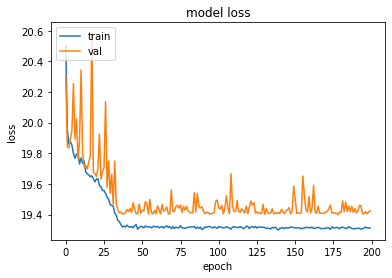

In [57]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [74]:
def build_model():
  NN_model = Sequential()

  # The Input Layer :
  NN_model.add(Dense(128, kernel_initializer='normal',input_dim=7, activation='relu'))

  # The Hidden Layers :
  NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
  NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
  NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))

  # The Output Layer :
  NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

  # Compile the network :
  NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
  NN_model.summary()
  return NN_model

In [75]:
import keras
from keras.models import load_model

model = build_model()
model.load_weights('Weights-158--0.01271.hdf5')

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 128)               1024      
_________________________________________________________________
dense_77 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_78 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_79 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 65        
Total params: 75,265
Trainable params: 75,265
Non-trainable params: 0
_________________________________________________________________


In [77]:
import numpy as np
test = train[3999:]
model.predict(test)

array([[48.953106],
       [51.63001 ],
       [33.673058],
       ...,
       [35.086708],
       [60.78499 ],
       [57.941093]], dtype=float32)